In [1]:
import numpy as np
from bitarray import bitarray

bit_vector = [True, False, True, False, True, True, True, True, False, False, False, True, True, False, True, True]
a = bitarray(bit_vector)
a

bitarray('1010111100011011')

In [2]:
a.buffer_info()

(1937217238144, 2, 'big', 0, 4, 0, 0, 0)

In [5]:
ndimension = 3
m = 4
rbv = [[[bitarray() for _ in range(m)] for _ in range(2)] for _ in range(ndimension)]
# Dim LowerBoundVectors   UpperBoundVectors
#  0  [P1L, P2L ... PML], [P1U, P2U ... PMU]
#  1  [P1L, P2L ... PML], [P1U, P2U ... PMU]
#          .......             .......
#  D  [P1L, P2L ... PML], [P1U, P2U ... PMU]
# rbv[dimension][lower/upper][interval]

In [12]:
LOWER = 0
UPPER = 1

rbv[0][LOWER][0].extend(bit_vector)

In [14]:
rbv[0][UPPER][1].extend(bit_vector)

In [15]:
rbv

[[[bitarray('1010111100011011'), bitarray(), bitarray(), bitarray()],
  [bitarray(), bitarray('1010111100011011'), bitarray(), bitarray()]],
 [[bitarray(), bitarray(), bitarray(), bitarray()],
  [bitarray(), bitarray(), bitarray(), bitarray()]],
 [[bitarray(), bitarray(), bitarray(), bitarray()],
  [bitarray(), bitarray(), bitarray(), bitarray()]]]

In [20]:
b = bitarray()
b.extend(np.tile(True, 16))
print(b)
b.buffer_info()

np.array(np.tile(True, 16), dtype=bool)

bitarray('1111111111111111')


<ipython-input-20-b42b6964a131>:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  b.extend(np.tile(True, 16))


(1937217238304, 2, 'big', 0, 4, 0, 0, 0)

In [22]:
b.extend(list(np.tile(True, 16)))

<ipython-input-22-6482670cbac0>:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  b.extend(list(np.tile(True, 16)))


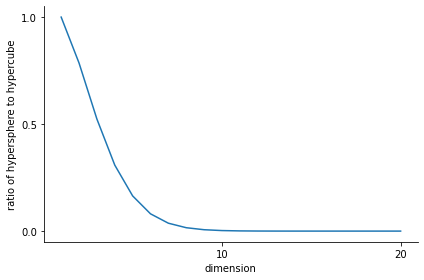

In [2]:
"""
Script to calculate and then plot the difference between the volume of a hypercube and the volume of the hypersphere contained within it.
"""

import math
import matplotlib.pyplot as plt
import pandas as pd

# xkcdify the plot
# plt.xkcd()

# create lists to contain the values
ratio_sphere_to_cube = []
dimension = []

for x in range(1, 21):
    dimension.append(x)

    volume_of_hsphere = (math.pow(math.pi, x/2) / math.gamma(x/2 + 1)) * math.pow(1, x)
    volume_of_hcube = math.pow(2, x)

    ratio = volume_of_hsphere/volume_of_hcube

    ratio_sphere_to_cube.append(ratio)

# create a DataFrame to hold the data
df = pd.DataFrame(ratio_sphere_to_cube, dimension)

fig = plt.figure()
ax = fig.gca()

# hide the top and right axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# put the x and y tick marks in the correct places
ax.set_xticks([0,10,20])
ax.set_yticks([0,0.5,1])

# Add labels
ax.set_xlabel("dimension")
ax.set_ylabel("ratio of hypersphere to hypercube")

# add the data to the plot
plt.plot(df)

# make sure the bottom label isn't cut off
plt.tight_layout()

# save the figure into the current folder.
fig.savefig("ratio.png")